<a href="https://colab.research.google.com/github/Satyam-BIT24/Satyam-BIT24/blob/main/FBSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:

import numpy as np
from scipy.signal import fftconvolve
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

def fbse_fawt_segmentation(image, filter_size=5, alpha=1, beta=1, gamma=1):
    if len(image.shape) == 3:  # Convert input image to grayscale if it has 3 dimensions
        image = rgb2gray(image)
    fbse_filter = np.array([[1, -1], [-1, 1]])
    fbse_filter = np.pad(fbse_filter, (filter_size // 2, filter_size // 2), mode='constant')
    fbse_conv = fftconvolve(image, fbse_filter, mode='same')
    std_dev = np.sqrt(fftconvolve(np.square(fbse_conv), np.ones((filter_size, filter_size)), mode='same') - np.square(fbse_conv))
    global_thresh = threshold_otsu(image)
    local_thresh = alpha * np.median(std_dev) + beta * np.mean(std_dev) + gamma * global_thresh
    segmented_image = np.zeros_like(image)
    segmented_image[image >= local_thresh] = 1
    return segmented_image

<ipython-input-37-1c27fe0b1e68>:12: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(fftconvolve(np.square(fbse_conv), np.ones((filter_size, filter_size)), mode='same') - np.square(fbse_conv))


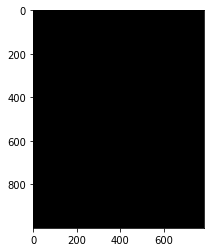

In [38]:
import matplotlib.pyplot as plt
from skimage import data
import cv2
image = cv2.imread("/content/2016.07.15_14.38.35_SMG_LE_0N4p5I-AvgLOG_0195.bmp")
segmented_image = fbse_fawt_segmentation(image)
plt.imshow(segmented_image, cmap='gray')
plt.show()


In [41]:
import numpy as np
import cv2
from scipy.signal import fftconvolve
from skimage.filters import threshold_otsu

def fbse_fawt_segmentation(image, filter_size=3, alpha=1, beta=1, gamma=1):
    # Create the FBSE filter
    fbse_filter = np.array([[1, -1], [-1, 1]])
    fbse_filter = np.pad(fbse_filter, (filter_size // 2, filter_size // 2), mode='constant')
    
    # Convolve the image with the FBSE filter
    fbse_conv = fftconvolve(image, fbse_filter, mode='same')
    
    # Calculate the standard deviation of the convolution result
    std_dev = np.sqrt(fftconvolve(np.square(fbse_conv), np.ones((filter_size, filter_size)), mode='same') - np.square(fbse_conv))
    
    # Calculate the threshold for segmenting the image
    global_thresh = threshold_otsu(image)
    local_thresh = alpha * np.median(std_dev) + beta * np.mean(std_dev) + gamma * global_thresh
    
    # Segment the image using the calculated threshold
    segmented_image = np.zeros_like(image)
    segmented_image[image >= local_thresh] = 1
    
    return segmented_image

# Read the input image
image = cv2.imread('/content/2016.07.15_14.38.35_SMG_LE_0N4p5I-AvgLOG_0195.bmp', cv2.IMREAD_GRAYSCALE)

# Apply the segmentation algorithm
segmented_image = fbse_fawt_segmentation(image)

# Display the segmented image
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


<ipython-input-41-f1250454c335>:15: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(fftconvolve(np.square(fbse_conv), np.ones((filter_size, filter_size)), mode='same') - np.square(fbse_conv))


NameError: ignored

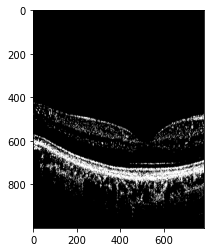

In [45]:
import numpy as np
import cv2
from scipy.signal import fftconvolve
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def fbse_fawt_segmentation(image, filter_size=8, alpha=0.5, beta=0.5, gamma=0.5):
    # Create the FBSE filter
    fbse_filter = np.array([[1, -1], [-1, 1]])
    fbse_filter = np.pad(fbse_filter, (filter_size // 2, filter_size // 2), mode='constant')
    
    # Convolve the image with the FBSE filter
    fbse_conv = fftconvolve(image, fbse_filter, mode='same')
    
    # Calculate the standard deviation of the convolution result
    std_dev = np.sqrt(fftconvolve(np.square(fbse_conv), np.ones((filter_size, filter_size)), mode='same') - np.square(fbse_conv))
    
    # Calculate the threshold for segmenting the image
    global_thresh = threshold_otsu(image)
    local_thresh = alpha * np.median(std_dev) + beta * np.mean(std_dev) + gamma * global_thresh
    
    # Segment the image using the calculated threshold
    segmented_image = np.zeros_like(image)
    segmented_image[image >= local_thresh] = 1
    
    return segmented_image

# Load the input image
image = cv2.imread('/content/2016.07.15_14.38.35_SMG_LE_0N4p5I-AvgLOG_0195.bmp', cv2.IMREAD_GRAYSCALE)

# Apply the segmentation algorithm
segmented_image = fbse_fawt_segmentation(image)

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.show()
